# **Introduction to ML [using JAX]**

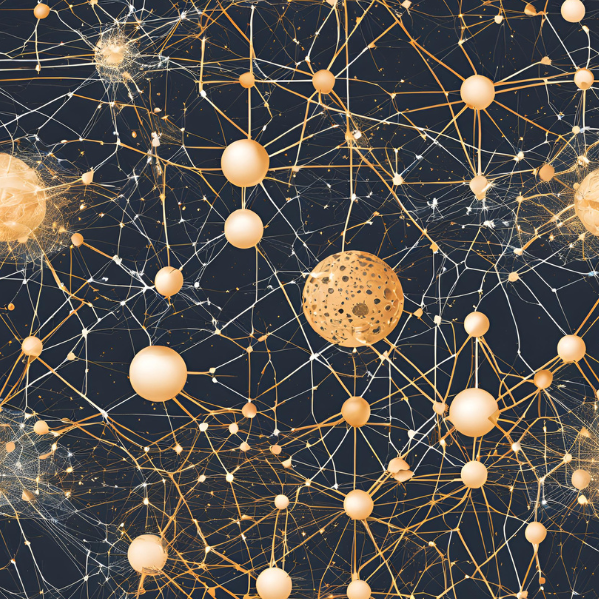


<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/Intro_to_ML_using_JAX/Introduction_to_ML_using_JAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Deep Learning Indaba 2024. Apache License 2.0.

**Authors:** Kale-ab Tessera, Geraud Nangue Tasse, Oluwabamigbe Oni

**Reviewers:** Doudou BA

**Introduction:**

In this tutorial, we will learn about some of the high-level concepts behind machine learning (ML) and the basics of JAX, a numerical computing library that we will use for our practicals. Finally, we will learn about fundamentals of supervised learning, from linear regression, all the way to neural networks, learning the fundamentals of optimisation along the way.

**Topics:**

Content: <font color='green'>`Numerical Computing`</font> , <font color='orange'>`Supervised Learning`</font>  
Level: <font color='grey'>`Beginner`</font>


**Aims/Learning Objectives:**

- Learn high-level concepts in ML - data, model and learning.
- Get a high-level overview of modern ML terminology.   
- Learn the basics of JAX and how to use it.
- Learn about linear regression and neural networks, and how to implement them in JAX.

**Prerequisites:**

- Basic knowledge of [NumPy](https://github.com/numpy/numpy).
- Basic knowledge of [functional programming](https://en.wikipedia.org/wiki/Functional_programming).

**Outline:**

>[Introduction to ML [using JAX]](#scrollTo=lM2waCJJYlzD)

>>[Installation and Imports](#scrollTo=6EqhIg1odqg0)

>[Part 1 - What is Machine Learning - 25 minutes ⏰](#scrollTo=cMhBHaeYEn9t)

>>[💻Introduction and Motivation](#scrollTo=OueV4gWwEn9u)

>>>[Is it a 1 or a 7?](#scrollTo=OueV4gWwEn9u)

>>>[What is Machine Learning?](#scrollTo=DIe8aXmGrWEL)

>>[🔑 Key Components](#scrollTo=pR-gqkkOEn9w)

>>>[1.1 Data](#scrollTo=dpo6ISGOEn9x)

>>[1.2 Models](#scrollTo=S586n3hEEn9z)

>>[1.3 Learning](#scrollTo=6BFPS0PSEgU6)

>>[1.4 Types of machine learning problems](#scrollTo=Y71M5dCdEn9z)

>>[1.5 Modern Terminology](#scrollTo=_ssdwdCLEn9z)

>>>[General Terminology](#scrollTo=_ssdwdCLEn9z)

>>>[Generative-modelling Terminology](#scrollTo=_ssdwdCLEn9z)

>[Part 2 - Basics of JAX - 25 minutes ⏰](#scrollTo=Enx0WUr8tIPf)

>>[2.1 Jax 🤝 NumPy](#scrollTo=xoPRK7mXTRct)

>>>[Similarities ✅](#scrollTo=0n3jH8LpJIrd)

>>>[Differences ❌](#scrollTo=Nq5R2c3mJMSa)

>>>>[Jax arrays are immutable (they can't be modified after they are created).](#scrollTo=ZTYv8INhRRDX)

>>>>[Randomness in NumPy vs JAX](#scrollTo=oAH4c_smdGQU)

>>[2.2 Core Jax Primitives - jit and grad](#scrollTo=6jowfM6eTv73)

>>>[jit - Just-In-Time Compilation](#scrollTo=48GKzQnrCxMe)

>>>[grad - Automatic Differentiation](#scrollTo=sxYQSmKdGpgt)

>>[2.3 Auto-vectorization - vmap](#scrollTo=N9JkQP9xVAGi)

>[Part 3 - Basics of supervised ML (Regression and Neural Networks) - 50 minutes ⏰](#scrollTo=aB0503xgmSFh)

>>[3.1 Linear Regression - 25 minutes ⏰ - 📈 Beginner](#scrollTo=XrWSN-zaWAhJ)

>>>[Regression Toy Example - Housing Prices](#scrollTo=AcyM6XRj1cDz)

>>>[Loss function and optimization](#scrollTo=hNJgESq_LP4R)

>>>[Training the model using Jax](#scrollTo=q9dQh9DdLYPE)

>>>[Neural networks](#scrollTo=XStsgHB2MarI)

>>>>[Activation functions](#scrollTo=fkpytbBzMvMj)

>>>>[Building a simple neural network model with Jax](#scrollTo=3Wrxt2orM7sk)

>>[3.2 Logistic Regression - 25 minutes ⏰ - 📈 Intermediate](#scrollTo=wMgxJU0TOX6O)

>>>>[Logits and sigmoid activation function](#scrollTo=SE1L3rmaO4UP)

>>>>[Extending to Multi-class classification](#scrollTo=HjQNjDC2cG2t)

>>>>[Building a simple neural network for classification](#scrollTo=EcXXE56hPOhK)

>>>>[Training the model](#scrollTo=GcSvlekHPWxW)

>>>>[Evaluating the model](#scrollTo=sGPvmGWkP1fT)

>[Conclusion](#scrollTo=fV3YG7QOZD-B)

>[Appendix:](#scrollTo=XrRoSqlxfi7f)

>>[Derivation of partial derivatives for exercise 2.4.](#scrollTo=9OH9H7ndfuyQ)

>[Feedback](#scrollTo=o1ndpYE50BpG)




**Before you start:**

For this practical, you will need to use a GPU to speed up training. To do this, go to the "Runtime" menu in Colab, select "Change runtime type" and then in the popup menu, choose "GPU" in the "Hardware accelerator" box.



## Installation and Imports

In [ ]:
## Install and import anything required. Capture hides the output from the cell.
# @title Install and import required packages. (Run Cell)

import subprocess
import os

# Based on https://stackoverflow.com/questions/67504079/how-to-check-if-an-nvidia-gpu-is-available-on-my-system
try:
    subprocess.check_output('nvidia-smi')
    print("a GPU is connected.")
except Exception:
    # TPU or CPU
    if "COLAB_TPU_ADDR" in os.environ and os.environ["COLAB_TPU_ADDR"]:
      print("A TPU is connected.")
      import jax.tools.colab_tpu
      jax.tools.colab_tpu.setup_tpu()
    else:
      print("Only CPU accelerator is connected.")
      # x8 cpu devices - number of (emulated) host devices
      os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count=8"
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap, pmap

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# @title Helper Functions. (Run Cell)
import copy
from typing import Dict


def plot_performance(data: Dict, title: str):
    runs = list(data.keys())
    time = list(data.values())

    # creating the bar plot
    plt.bar(runs, time, width=0.35)

    plt.xlabel("Implementation")
    plt.ylabel("Average time taken (in s)")
    plt.title(title)
    plt.show()

    best_perf_key = min(data, key=data.get)
    all_runs_key = copy.copy(runs)

    # all_runs_key_except_best
    all_runs_key.remove(best_perf_key)

    for k in all_runs_key:
        print(
            f"{best_perf_key} was {round((data[k]/data[best_perf_key]),2)} times faster than {k} !!!"
        )

In [ ]:
# @title Check the device you are using (Run Cell)
print(f"Num devices: {jax.device_count()}")
print(f" Devices: {jax.devices()}")

Text Cell below creates a LaTeX Macro to be used in math equations.

# **Part 1 - What is Machine Learning** - 25 minutes ⏰

## 💻**Introduction and Motivation**

### Is it a 1 or a 7?

Imagine you had to design a system that had to detect the text from people's handwriting. Could you code this up from first principles?

If you think about, this problem is really hard! Even a simpler version of this problem, where you only have to identify numbers, is quite difficult. Each input can be one of 10 different numbers, and each number can be written in many different ways. What about numbers with many digits?

If you are stuck, do not worry, this is challenging problem to solve. They key insight to solve this problem is knowing that although the rules might be difficult, i.e. how to map from an image of someone's handwritten 9 to the number 9, you are able to do this task yourself. You can look a handwritten number and tell what number it is. With this ability you can collect a large dataset of handwritten digits and label this dataset with the correct number. Using this dataset, you can train a machine learning model to do the task -- the same task that would be really challenging to do using rules.  



**Exercise 1.1** Let's play a digit guessing game! Can you identify these digits? Do you think this is hard for a computer to do?

In [ ]:
## Hide code.
# @title Helper functions. (Run Cell)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from ipywidgets import interact, widgets
from IPython.display import display, HTML
import io

# Function to display an image and get user input
def display_and_guess(x_train, y_train, question, options):
    idx = np.random.randint(0, len(x_train))
    image = x_train[idx]
    label = y_train.iloc[idx]

    # Create the image
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(question, fontsize=12)

    # Convert plot to image
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img = widgets.Image(value=buf.getvalue(), format='png')
    plt.close(fig)

    output = widgets.Output()

    def on_button_click(b):
        with output:
            output.clear_output()
            if b.description == str(label):
                display(HTML(f'<p style="color:green; font-size:12px;"><b>Correct! 🎉</b></p>'))
            else:
                display(HTML(f'<p style="color:red; font-size:12px;"><b>Incorrect. It was a \'{label}\'. 😔</b></p>'))

    # Create buttons dynamically based on the provided options
    buttons = [widgets.Button(description=str(option), button_style='info', layout=widgets.Layout(width='40px')) for option in options]
    for button in buttons:
        button.on_click(on_button_click)

    return widgets.VBox([img, widgets.HBox(buttons), output])

def numbers_recognition_game(rounds=2):

    # Play the game for a few rounds
    display(HTML('<h1 style="text-align:center;">Let\'s play a digit guessing game!</h1>'))

    # Load the MNIST dataset
    mnist = fetch_openml('mnist_784', version=1)
    X = mnist['data'].values.reshape(-1, 28, 28)
    y = mnist['target'].astype(int)

    # Prepare datasets for '1' vs '7' and '0' vs '6'
    datasets = {
        "1 vs 7": (X[np.where((y == 1) | (y == 7))[0]], y.iloc[np.where((y == 1) | (y == 7))[0]]),
        "0 vs 6": (X[np.where((y == 0) | (y == 6))[0]], y.iloc[np.where((y == 0) | (y == 6))[0]])
    }

    for _ in range(rounds):
        row = []
        for question, (x_train, y_train) in datasets.items():
            options = [int(digit) for digit in question.split(" vs ")]
            row.append(display_and_guess(x_train, y_train, f"Is this a {question}?", options))

        # Add a third column with a random question
        random_question = np.random.choice(list(datasets.keys()))
        x_train, y_train = datasets[random_question]
        options = [int(digit) for digit in random_question.split(" vs ")]
        row.append(display_and_guess(x_train, y_train, f"Is this a {random_question}?", options))

        display(widgets.HBox(row))

    display(HTML('<h2 style="text-align:center;">Thanks for playing!</h2>'))

In [ ]:
numbers_recognition_game(rounds=2)

### What is Machine Learning?

Machine learning (ML) is about designing algorithms that automatically extract useful information from data ([mathematics for machine learning](https://mml-book.github.io/)). Instead of explicitly programming every rule, ML allows the computer to learn from data and make predictions or decisions based on what it has learned.

In ML, there are three main components: data, models, and learning.

## 🔑 **Key Components**

- Data: These are a generally a colletion of examples that we want to learn from.  
- Models: Functions that take data as input and produce predictions or decisions as output. These models are controlled by parameters, which are like adjustable knobs that determine how the model behaves.
- Learning: The process of adjusting the model's parameters to improve its performance on a specific task.

### 1.1 **Data**

ML finds patterns in data, which can be in the form of images, text, audio, etc. For computers to work with data, it needs to be represented numerically, often as vectors or matrices (you can think of these as lists or grids of numbers). For example, an image can be represented as a grid of pixel values.

In our data, we typically have two main components: inputs (also called features) and labels. The input is what we use to make predictions, and the label is what we want to predict. In a digit recognition example, the input would be an image of a digit, and the label would be the actual digit (e.g., 0, 1, 2, ..., 9).

In supervised learning, we collect data as input-output pairs, with each example referred to as a sample, and together they form a dataset. We use this dataset to train a model that can predict the output given a new input. The dataset is split into two parts: the training set and the test set. The training set is used during learning (which we will discuss below), while the test set is used to evaluate how well the model performs on new, unseen data.


For example, in our digit recognition scenario, the input might be a 28x28 grid of pixel values representing the grayscale intensity of the pixels, where 0 is black and 255 is white. The label would be the digit in the image (0-9).

In [ ]:
## Hide code.
# @title Visualise data. (Run Cell)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load MNIST dataset
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Convert data to numpy arrays and ensure correct data type
X = np.array(X).astype(float)
y = np.array(y).astype(int)

# Print information about the dataset
print(f"Dataset shape (Num_Examples, Size of Each Example (28*28)): {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of unique labels/numbers: {len(np.unique(y))}")

# Display an example image with pixel values
example_index = 0
example_image = X[example_index].reshape(28, 28)
example_label = y[example_index]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the pixel values
ax1.imshow(example_image, cmap='gray')
ax1.set_title("Raw Pixel Values")
for i in range(28):
    for j in range(28):
        ax1.text(j, i, f'{int(example_image[i, j])}',
                 ha='center', va='center', color='red', fontsize=6)

# Add shape information to axis labels
ax1.set_xlabel("Width: 28 pixels")
ax1.set_ylabel("Height: 28 pixels")


# Display the image
ax2.imshow(example_image, cmap='gray')
ax2.set_title(f"Example Image (Label: {example_label})")
ax2.axis('off')


plt.tight_layout()
plt.show()


The dataset might have 70,000 grayscale images. If we split this dataset into 80% training data and 20% test data, we would have 56,000 images for training and 14,000 images for testing.

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDataset split:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

The quality of the dataset is crucial. If the data is noisy, missing values, or biased, it can lead to poor model performance. The saying "garbage in, garbage out" applies here. The size of the dataset is also important. A larger dataset can help the model learn better patterns.

## 1.2 **Models**

Models transform data in useful ways. They take input data and produce the desired output. Formally, a model is a function $f(x)$ that maps input data $x$ (a sample from our dataset) to output data $y$ (the label). For example, in digit recognition, the input is an image of a digit, and the output is the predicted digit.

The model's behavior is controlled by parameters, which are adjustable values updated during the learning process.

## 1.3 **Learning**

Learning is the process of improving the model's performance by updating its parameters. The performance is measured using an objective function, often called the loss function, which quantifies how well the model is doing. The goal is to minimize this loss function (we could also maximise this function, but conventionally we minimise it).

The loss function $L$ takes the model's prediction $f(x)$ and the actual outcome $y$, and outputs a number that represents how close the prediction is to the actual outcome.

The learning algorithm is responsible for adjusting the model's parameters to minimize the loss function. Intuitively, you can think of learning as tuning the model's knobs (parameters) to get the desired behavior. The learning algorithm does the tuning, while the loss function tells us how well the tuning is working.

Formally, learning involves finding the parameters $\theta$ of our model $f$ that minimize the loss function $L$ over our dataset $X$. However, our goal is not just to perform well on the training data; we want the model to generalize well to new, unseen data. We will discuss this in more detail in Section 3.

Learning can occur in various settings, we will discuss the main types of learning in the next section.

## **1.4 Types of machine learning problems**

Broadly speaking, machine learning tasks can be classified into three categories.

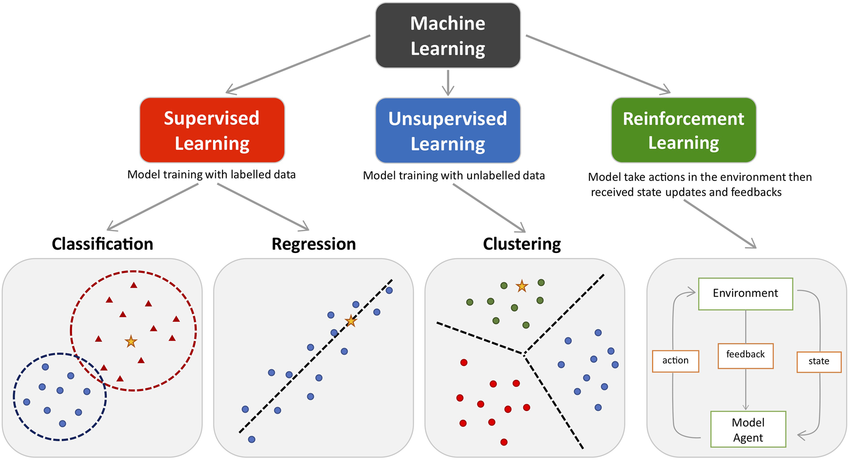

[Image Source](https://www.researchgate.net/publication/354960266/figure/fig1/AS:1075175843983363@1633353305883/The-main-types-of-machine-learning-Main-approaches-include-classification-and.png).

**Supervised Learning**: In supervised learning, the algorithm is trained on a labeled dataset, where each input data point is paired with the correct output (label). The goal is to learn a mapping from inputs to outputs based on the training data. Once trained, the model can make accurate predictions on new, unseen data. This approach is commonly used for tasks like classification and regression, where the correct answers are known during training.

**Unsupervised Learning**: In unsupervised learning, the algorithm works with an unlabeled dataset, meaning the data has no predefined labels or outcomes. The objective is to discover patterns, structures, or relationships within the data. This might involve grouping similar data points (clustering) or reducing the dimensionality of the data to uncover hidden patterns. Unsupervised learning is often used in exploratory data analysis and for finding natural groupings in data.

**Reinforcement Learning**: In reinforcement learning, the algorithm learns to make decisions by interacting with an environment. The learner, known as the agent, takes actions and receives feedback in the form of rewards or penalties. The goal is to learn a strategy, or policy, that maximizes the cumulative reward over time. Reinforcement learning is commonly applied in areas like robotics, game playing, and autonomous systems, where an agent must learn to navigate complex environments.

**Exercise 1.2**: Can you identify to which of the categories the following task belongs?
  - Teaching a robot how to walk.
  - Weather prediction.
  - Spam email classification.
  - Teach a computer how to play chess.
  - Grouping together different kinds of movie reviews.

In [ ]:
# @title Solution - Exercise (Try not to peek until you've given it a good try!')
print("Teaching a robot how to walk -- Reinforcement learning")
print("Weather prediction -- Supervised learning")
print("Spam email classification -- Supervised learning")
print("Teach a computer how to play chess -- Reinforcement learning")
print("Grouping together different kinds of movie reviews -- Unsupervised learning")

## **1.5 Modern Terminology**

In the recent years, several new concepts and terms have emerged in ML. We will briefly discuss some of these modern terminologies that might be relevant to your learning journey:

### **General Terminology**

- *Deep learning* is a subfield of ML that leverages neural networks with multiple layers (hence the term "deep") to learn complex patterns in data. These deeper networks are particularly effective at processing large, unstructured datasets such as images, audio, and text. Deep learning has revolutionized several domains, including computer vision, natural language processing, and speech recognition. We will explore deep learning in more detail in Section 3.
- *Self-supervised learning* is a type of learning where the model learns from the data itself without requiring explicit labels. The model is trained to predict certain parts of the input data based on other parts, effectively creating its own supervision signal. This is different from supervised learning, where the model learns from labeled examples provided by humans, and unsupervised learning, where the model learns patterns from unlabeled data. Self-supervised learning has gained popularity due to its ability to leverage large amounts of unlabeled data for training.

### **Generative-modelling Terminology**

- *Generative vs Discriminative Models* - Generative models are a class of ML models that learn the underlying distribution of a dataset to generate new data samples that resemble the original data. Unlike discriminative models, which focus on distinguishing between different types of data (e.g., classifying images of digits), generative models aim to create new instances of data (e.g. generating new images of digits). This capability is particularly useful for tasks like image generation, text-to-image synthesis, and style transfer. Popular examples of generative models include Generative Adversarial Networks (GANs), Variational Autoencoders (VAEs), and Autoregressive Models.
- *Autoregressive Models* generate data sequentially, predicting each new element in a sequence based on the previously generated ones. These models are widely used in sequence generation tasks, such as text generation, music composition, and time series forecasting. By leveraging the dependencies between sequential elements, autoregressive models can produce coherent and contextually appropriate sequences. *Large Language Models (LLMs)* are a prominent example of autoregressive models, designed to predict the next token in a sequence based on the preceding tokens (i.e. autoregressively), based on vast amounts of text data. LLMs have demonstrated impressive capabilities in natural language processing tasks, such as text generation, translation, and summarization. Notable examples of LLMs include GPT-3, BERT, and T5. *Transformers* are a popular neural network architecture used in LLMs, known for their parallel processing of input sequences and self-attention mechanism. If you are interested in learning more about LLMs and transformers, there is an [LLM practical]().
- *Diffusion models* are a class of generative models that learn to generate data by reversing a gradual process of adding noise. In these models, data (like images) is progressively corrupted by adding noise until it becomes indistinguishable from random noise. The model then learns to reverse this process, generating clean data from noise. Diffusion models have shown great promise in generating high-quality images, with notable examples including Imagen and DALL-E. If you are interested in learning more, there is a [diffusion practical]().

# **Part 2 - Basics of JAX** - 25 minutes ⏰

Before we learn more details about ML models, we cover some basics of Jax, the programming framework which we will be using for our practicals.


**What is JAX?**

[JAX](https://jax.readthedocs.io/en/latest/index.html) is a python package/framework designed for high performane numerical operations and machine learning. It can been seen as an accelerated version of NumPy, and is commonly used with higher-level neural network libraries such as [Flax](https://github.com/google/flax).

<details>
  <summary>More details on Jax.</summary>
  <p>JAX is a python package for writing composable numerical transformations. It leverages Autograd and XLA (Accelerated Linear Algebra), to achieve high-performance numerical computing, which is particularly relevant in machine learning.

It provides functionality such as automatic differentiation (grad), parallelization (pmap), vectorization (vmap), just-in-time compilation (jit), and more. These transforms operate on pure functions, so JAX encourages a functional programming paradigm. Furthermore, the use of XLA allows one to target different kinds of accelerators (CPU, GPU and TPU), without code changes.

JAX is different from frameworks such as PyTorch or Tensorflow (TF). It is more low-level and minimalistic. JAX simply offers a set of primitives (simple operations) like jit and vmap, and relies on other libraries for other things e.g. using the data loader from PyTorch or TF. Due to JAX's simplicity, it is commonly used with higher-level neural network libraries such as Haiku or Flax. (Imagine writing complicated architectures using a NumPy-like interface alone! 😮 ).</p>
</details>

## 2.1 Jax 🤝 NumPy

Jax has some similarities with numpy and subtle differences with Numpy to be aware of.

### Similarities ✅

Jax and NumPy both allow you to do array-based on operations, using a similair interface. This means you can run many of favourite numpy operations in Jax, using a similar API.

In [ ]:
import numpy as np
import jax.numpy as jnp

def print_comparison(title, np_result, jax_result):
    print(f"\n{title}")
    print("=" * 40)
    print(f"NumPy: {np_result}")
    print(f"JAX:   {jax_result}")
    print("-" * 40)

# Create arrays for use in examples
np_array1, np_array2 = np.array([1, 2, 3]), np.array([4, 5, 6])
jax_array1, jax_array2 = jnp.array([1, 2, 3]), jnp.array([4, 5, 6])

Element-wise Addition - `+` - Adding two arrays together.

In [ ]:
np_add = np_array1 + np_array2
jax_add = jax_array1 + jax_array2
print_comparison("Element-wise Addition", np_add, jax_add)

Indexing and Slice - `[]` - Accessing elements in an array. E.g. `array[0]` to get the first element, or `array[1:3]` to get elements 1 and 2.

In [ ]:
np_slice = np_array1[1:4]
jax_slice = jax_array1[1:4]
print_comparison("Array Slicing", np_slice, jax_slice)

Array Concatenation - `.concatenate` - Combining arrays together.

In [ ]:
np_concat = np.concatenate([np_array1, np_array2])
jax_concat = jnp.concatenate([jax_array1, jax_array2])
print_comparison("Array Concatenation", np_concat, jax_concat)

Matrix Multiplication - `.dot` - Multiplying two matrices together.


In [ ]:
# Create arrays for use in examples
np_matrix = np.array([[1, 2], [3, 4]])
jax_matrix = jnp.array([[1, 2], [3, 4]])

In [ ]:
np_matmul = np.dot(np_matrix, np_matrix)
jax_matmul = jnp.dot(jax_matrix, jax_matrix)
print_comparison("Matrix Multiplication", np_matmul, jax_matmul)

Mathematical Operations - `.sin` - Applying mathematical functions to arrays.

In [ ]:
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(0, 2*np.pi, 100)

# Calculate sine using NumPy
y_np = np.sin(x)

# Calculate sine using JAX
y_jax = jnp.sin(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_np, label='NumPy sin(x)', color='blue')
plt.plot(x, y_jax, label='JAX sin(x)', color='red', linestyle='--')
plt.title('Sine Function: NumPy vs JAX')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()


### Differences ❌

Although JAX and NumPy have some similarities, they do have some important differences. We will discuss some of API differences here.


#### 1. Jax arrays are immutable (they can't be modified after they are created).

JAX arrays are immutable, meaning you cannot change the values of an array once it has been created. This is different from NumPy, where you can modify the values of an array in-place.

Let's see this in practice by changing the number at the beginning of an array.

In [ ]:
# NumPy: mutable arrays
x = np.arange(10)
# change the first element of x
x[0] = 10
print(x)

Let's try this in JAX.

In [ ]:
# JAX: immutable arrays
# Should raise an error.
try:
    x = jnp.arange(10)
    x[0] = 10
except Exception as e:
    print("Exception {}".format(e))

So it fails! We can't mutate a JAX array once it has been created. To update JAX arrays, we need to use [helper functions](https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html) that return an updated copy of the JAX array.

Instead of doing this `x[idx] = y`, we need to do this `x = x.at[idx].set(y)`.

In [ ]:
x = jnp.arange(10)
new_x = x.at[0].set(10)
print(f" new_x: {new_x} original x: {x}")

Note here that `new_x` is a copy and that the original `x` is unchanged.

#### 2. Randomness in NumPy vs JAX

JAX requires you to be more explicit when generating random numbers. You have to pass in a key each time you call a function that has some randomness.

Let's see the differences in how JAX and NumPy generate random numbers.

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import random

# Generate random numbers using NumPy
np.random.seed(0)
np_rand = np.random.rand(3)
print(f"NumPy Random: {np_rand}")

# Generate random numbers using JAX
key = random.PRNGKey(0)
jax_rand = random.uniform(key, (3,))
print(f"JAX Random: {jax_rand}")

In JAX, you need to pass a key to the random functions **every time** you call it. This key is used to generate random numbers in a reproducible way. You can think of the key as a seed for the random number generator.

Generating multiple random numbers in JAX requires you to create new keys (using `split`) each time you call the random function. This ensures that the random numbers are independent of each other.

Let's modify the example to generate multiple sets of random numbers in JAX:

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import random

# Generate random numbers using NumPy
np.random.seed(0)
np_rand = np.random.rand(3)
print(f"NumPy Random: {np_rand}")

# Generate random numbers using JAX
key = random.PRNGKey(0)
jax_rand = random.uniform(key, (3,))
print(f"JAX Random: {jax_rand}")

# Generating multiple sets of random numbers in NumPy
np_random_set1 = np.random.rand(3)
np_random_set2 = np.random.rand(3)
print(f"NumPy Random Set 1: {np_random_set1}")
print(f"NumPy Random Set 2: {np_random_set2}")

# Generating multiple sets of random numbers in JAX
key = random.PRNGKey(0)

# Split the key each time to generate a new subkey
# For each set of random numbers, you split the current key into a new key and a subkey.
key, subkey1 = random.split(key)
# Use this new key for calling random functions.
jax_random_set1 = random.uniform(subkey1, (3,))

key, subkey2 = random.split(key)
jax_random_set2 = random.uniform(subkey2, (3,))


print(f"JAX Random Set 1: {jax_random_set1}")
print(f"JAX Random Set 2: {jax_random_set2}")

More explicit randomness aids in reproducibility.

If you are interested in more details on this, please see the "Randomness in NumPy vs JAX" from the [2022 Intro to ML Indaba practical](https://github.com/deep-learning-indaba/indaba-pracs-2022/blob/main/practicals/Introduction_to_ML_using_JAX.ipynb) or you can read more [here](https://jax.readthedocs.io/en/latest/jep/263-prng.html).

## 2.2 Core Jax Primitives - `jit` and `grad`

In this section, we will briefly mention two common JAX transforms: `jit` and `grad`.

### `jit` - Just-In-Time Compilation

jit (Just-in-time compilation) - compiles and caches JAX Python functions so that they can be run efficiently on XLA to *speed up function calls*.

`jit` takes in a Python function and returns a compiled version of that function. Simply wrap your function with `jax.jit` to compile it and call it:

In [ ]:
import jax
import jax.numpy as jnp

# Define a simple function to add two arrays
def add(a, b):
    return jnp.add(a, b)

# Use JIT to compile the function
add_jitted = jax.jit(add)

# Create some example arrays
x = jnp.array([1.0, 2.0, 3.0])
y = jnp.array([4.0, 5.0, 6.0])

# Call the jitted function
result = add_jitted(x, y)
print(result)

There are rules about what kinds of functions can be compiled with `jit`. For example, functions that contain Python control flow (like loops or conditionals) may not be compatible with `jit`. You can find more information about `jit` in the [JAX documentation](https://jax.readthedocs.io/en/latest/jit-compilation.html#why-can-t-we-just-jit-everything).

### `grad` - Automatic Differentiation

`grad` is used to automatically compute the gradient of a function in JAX. It can be applied to Python and NumPy functions, which means you can differentiate through loops, branches, recursion, and closures.

`grad` takes in a function `f` and returns a function. If `f` is a mathematical function $f$, then `grad(f)` corresponds to $f'$ (Lagrange's notation), with `grad(f)(x)` corresponding to $f'(x)$.

Here is simple example of how to use `grad`:

In [ ]:
import jax
import jax.numpy as jnp

# Define a simple function to compute the square of a number
def square(x):
    return x ** 2

# Use grad to compute the gradient of the square function
grad_square = jax.grad(square)

# Compute the gradient at x = 3
x = 3.0
grad_at_x = grad_square(x)
print(grad_at_x)

If you need a refresher on the intituition behind gradients, you can check out this [video](https://youtu.be/VMj-3S1tku0?feature=shared&t=492).

For a more detailed explanation of `grad` or `jit`, you can refer to the "Basic JAX Transformations - jit and grad" section from the [2022 Intro to ML Indaba practical](https://github.com/deep-learning-indaba/indaba-pracs-2022/blob/main/practicals/Introduction_to_ML_using_JAX.ipynb).

## 2.3 Auto-vectorization - `vmap`

`vmap` (Vectorizing map) automatically vectorizes your python functions. This means you can write a function that operates on single examples, and `vmap` will automatically apply it to a batch of examples.

Here is a simple example of how to use `vmap`:

In [ ]:
import jax
import jax.numpy as jnp

# Define a simple function to compute the square of a number
def square(x):
    return x ** 2

# Use vmap to vectorize the square function
vectorized_square = jax.vmap(square)

# Compute the square of a batch of numbers
x = jnp.array([1.0, 2.0, 3.0])

# Apply the vectorized function to the batch
squared_batch = vectorized_square(x)
print(squared_batch)

Without `vmap`, you would have to write a loop to apply the function to each element in the batch. `vmap` automatically vectorizes the function, making it more efficient and concise.

`squared_batch = vectorized_square(x)` replaces the following loop:

```
squared_batch = []
for elem in x:
    squared_batch.append(square(elem))
squared_batch = jnp.array(squared_batch)
```

Again for more details on vmap and other operators, you can refer to the "More Advanced Transforms - vmap and pmap" section from the [2022 Intro to ML Indaba practical](https://github.com/deep-learning-indaba/indaba-pracs-2022/blob/main/practicals/Introduction_to_ML_using_JAX.ipynb) or the [JAX documentation](https://jax.readthedocs.io/en/latest/automatic-vectorization.html).

Now that we have a high-level understanding of ML and the basics of JAX, we can dive deeper into supervised learning and explore how to build and train models using JAX.

# **Part 3 - Basics of supervised ML (Regression and Neural Networks)** - 50 minutes ⏰

Now that we know some basics of JAX, we can do some machine learning! We will start with some simple models (linear regression), then build our way up towards more complex models (neural networks). First, we need to grab some key ML concepts.

The curve below is a plot of some data generated using a Sine function. Most often in science, we have data collected through experiments and we want to find a function that explains the data. In general, we need to find a function that maps some inputs in some dimension to some outputs in another dimension.
The process of finding such a function also called **model** is commonly referred to in various fields as **regression**.

In machine learning, this refers to finding a function that maps a set of numerical values called **features** to another set of numerical values called **labels or target**.  If the function is linear, the process is referred to as **linear regression**.

In [ ]:
# @title Helper code to plot a Sine curve
amplitude = 2
x = np.linspace(0, 2*np.pi, 1000)
y = amplitude*np.sin(x) + np.random.randn(1000)*0.1   # Calculate y values using the sine function
yfit = amplitude*np.sin(x)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="data", color='red')
plt.plot(x, yfit, label=f'Sine Curve with Amplitude = {amplitude}', color='black')
plt.title('Sine Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.grid()
plt.show()

## **3.1 Linear Regression** - 25 minutes ⏰ - 📈 <font color='blue'>`Beginner`</font>

With a long history spanning from the 19th century [[Gauss, 1809](https://cir.nii.ac.jp/crid/1573950399668535168), [Legendre, 1805](https://play.google.com/store/books/details?id=7C9RAAAAYAAJ&rdid=book-7C9RAAAAYAAJ&rdot=1)] , linear regression is one of the simplest and most popular methods for solving regression problems (problems where we  are predicting a continuous variable).   

Supposed we have a Dataset, with elements $y$ representing the labels and elements $\mathbf{x}$ representing the features, our goal is to find a function $f$ that maps the features $\mathbf{x} \in \mathbb{R}^d$ to the target variable $y$:
$$ y \, =\, f(\mathbf{x}). $$

The linear regression model can be represented mathematically as follows
$$ f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b,$$
where $\mathbf{w} \in \mathbb{R}^d$. $\mathbf{w}$ and $b$ are the parameters of the model usually referred to as weights. The term $b$ is commonly referred to as the bias and it can be included in $\mathbf{w}$ by extending the feature vector $\mathbf{x}$ with 1.

An intuitive way to understand the equations above is to remember the equation of a line $$y \, = \, mx + c,$$ with the weights and the bias corresponding to the slope and the intercept, $m$ and $c$ respectively.

### Regression Toy Example - Housing Prices

Let's say we have a dataset of housing sizes (in $m^2$) and their prices (in 100 000s of Tunisian dinar - TND).

|Size of House in $m^2$ (input - $x$) | Price (100 000s of TND) (output - $y$)  
--- | --- |
|210|4|
|160|3.3|
|240|3.7|
|140|2.3|
|300|5.4|

Let's build this simple dataset, with 5 elements.

$\mathbf{x}$ is the Size of House in $m^2$, while $\mathbf{y}$ is the Price (100 000s of TND) as specified above.

In [ ]:
X = jax.numpy.asarray([[210], [160], [240], [140], [300]])
Y = jax.numpy.asarray([[4], [3.3], [3.7], [2.3], [5.4]])

In [ ]:
# @title Let's plot our dataset. (Run Cell)
def plot_basic_data(parameters_list=None, title="Observed data", axis_pad=1):
    #set an upper and lower bound limit for the plot included a padding of 1
    xlim = [X.min() - axis_pad, X.max() + axis_pad]
    ylim = [Y.min() - axis_pad, Y.max() + axis_pad]
    fig, ax = plt.subplots()

    if parameters_list is not None:

        #create an evenly spaced list of numbers between 0 and 100
        x_pred = np.linspace(xlim[0], xlim[1], 100)
        for parameters in parameters_list:
            #calculate y value using y = mx + c and plot a dotted line
            y_pred = parameters[0] + parameters[1] * x_pred
            ax.plot(x_pred, y_pred, ":", color=[1, 0.7, 0.6])

        #plot another solid red line with the last paramater tuple
        parameters = parameters_list[-1]
        y_pred = parameters[0] + parameters[1] * x_pred
        ax.plot(x_pred, y_pred, "-", color=[1, 0, 0], lw=2)

    #Plot data points
    ax.plot(X, Y, "ob")
    ax.set(xlabel="Input x", ylabel="Output y", title=title, xlim=xlim, ylim=ylim)
    ax.grid()


plot_basic_data()

Code demonstration: Let's build a random linear model for our dataset, by sampling $\mathbf{w}$ and $b$ randomly.

In [ ]:
# @title Run this to generate the random parameters w and b, and evaluate the resulting linear model on the first input (x=210)
# store the parameters in a dictionary

# Input dimension
x = X[:1]
dim = 1

# Model parameters
w_key = jax.random.PRNGKey(1)
w = jax.random.uniform(w_key, (dim,))

b_key = jax.random.PRNGKey(2)
b = jax.random.uniform(b_key, (1,))

params = dict(w=w, b=b)

# Evaluating
y = jnp.dot(w,x) + b  # can also be achieved using: y = x @ w + b
print("Parameters",params,"Prediction",y)

**Code task:**

In the above cell, we demonstrated how to compute the output of a linear model for a single example in a dataset. When implementing a machine learning model we want to take advantage of linear algebra techniques and available computing resources to process a batch of data at once.

Given datasets $\mathbf{X}$ with multiple examples stacked in the matrix, write a function that applies a linear model to every example.


In [ ]:
def linear_model(params: Any, X: jnp.ndarray) -> jnp.ndarray:
  # complete this code
  w = params['w']
  b = ... # update me. hint look at the above line for w

  # compute m = f(x) here using w,b and X
  m = ... # update me.

  return m

In [ ]:
# @title Run me to test your code

def test_linear_model():
  assert (linear_model(params, X) == X @ w + b).all()
  print("Nice! Your answer looks correct.")

test_linear_model()

In [ ]:
# @title Solution - linear model (Try not to peek until you've given it a good try!')
def linear_model(params: Dict[str, jnp.ndarray], X: jnp.ndarray) -> jnp.ndarray:
  # complete this code
  w = params['w']
  b = params['b']

  # compute m = f(x) here using w,b and X
  m = X @ w + b

  return m

### Loss function and optimization


**Loss function**

Whenever we are fitting a model to some data, we need a function to measure how well the model is performing. This function is called the **loss function**. It measures the amount of errors between our model and data.

In [ ]:
# @title Helper code to plot errors

# Set random seed for reproducibility
np.random.seed(42)

# Number of points to generate
num_points = 20

# Generate random points and lines
points_x = np.random.rand(num_points)
slope_random_line = np.random.rand()
intercept_random_line = np.random.rand()

# Simulating the points y value with some distortion to using y = mx + c + randomness
points_y = slope_random_line * points_x + (intercept_random_line + np.random.normal(0, 1, num_points)*0.15)

# Function to calculate distance from point (x, y) to the line y = mx + b
def distance_to_line(x, y, m, b):
    return abs(y - m * x - b) / np.sqrt(1 + m**2)

# Calculate distances from each point to the random line
distances = distance_to_line(points_x, points_y, slope_random_line, intercept_random_line)

distances

In [ ]:
# Create the scatter plot of distances
plt.figure(figsize=(10, 6))

# Plot the random line
plt.plot(np.sort(points_x), slope_random_line * np.sort(points_x) + intercept_random_line, c='blue', label='Model')

# Plot the points
plt.scatter(points_x, points_y, c='red', label='Data', marker='o', s=50)

# Plot lines from each point to the random line (in different colors)
for i in range(num_points):
    plt.plot([points_x[i], points_x[i]], [points_y[i], slope_random_line * points_x[i] + intercept_random_line],
             c='green', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Errors for each data point")
plt.legend()
plt.show()

Consider the figure above with data points in red. If the blue line is our model, then vertical green lines represent the errors we make on each data point. The loss function tries to capture the total error we make for every data point. One loss function we can use in this case is the <font color='red'>mean square error</font> between the predicted and the true values. This is equivalent to summing up all the distances in green. This can be written mathematically as follows:
$$ \mathcal{L}(\mathbb{θ}) \, = \, \frac{1}{m}∑_{i}({y_i - \hat{y}_i})^2,$$
where $\mathbb{θ} = [\mathbf{w}, b]$,  $\mathcal{L}$ denotes the loss function, $y$ represents the actual or expected value, $\hat{y}$ represents the predicted value by the model and $m$ is the total number of datapoints.

Inserting the formula for a linear model, we obtain the following equation:

$$\mathcal{L}(\mathbb{θ}) \, = \, \frac{1}{m}∑_{i}(y_i - \mathbf{w}^T\mathbf{x}_i - b)^2. $$

<font color='red'>Note: they are different loss functions we could use in this case. You can see some other common loss functions [here](https://www.geeksforgeeks.org/ml-common-loss-functions/).</font>

**Code task:** Implement the loss function above using the linear model function defined above.



In [ ]:
def loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):
  # complete this code

  pred = linear_model(params, X)

  loss = ... # your code here

  return 0

In [ ]:
# @title Run to test my code
data = Y
def test_linear_loss_fn():
  pred = linear_model(params, X)
  loss = jnp.mean((pred-data)**2)
  assert loss_fn(params, X, data) == loss
  print("Nice! Your answer looks correct.")

test_linear_loss_fn()

In [ ]:
# @title Sample solution (Try not to peek until you've given it a good try!')
def loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):
  # complete this code

  pred = linear_model(params, X)

  loss = jnp.mean((pred-y)**2)

  return loss

**Excercise:** Discuss in groups how we can find the parameters, $\mathbb{θ}$.

🎯 **What is optimization?**

Optimization as the name entails is the process of finding the optimal parameters of the model, i.e. the set of parameters that gives the minimum loss possible. Mathematically this is represented as follows

$$\hat{\theta} \,= \, \underset{\mathbf{\theta}}{\operatorname{argmin}} \frac{1}{m}∑_{i}(y_i - \mathbf{w}^T\mathbf{x}_i - b)^2.$$

<font color='red'> How do we optimise </font>: The figure below is an example plot of the loss at different values of $\mathbf{w}$ and $b$ for a straight line. The minimum value is indicated with the star. Our goal in optimization is to identify this point.   

In [ ]:
# @title Helper code (to visualise loss landscape)
# Define the loss function (Mean Squared Error)
from matplotlib.colors import LogNorm

def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Create a grid of weight (slope) and bias (intercept) values
weight_values = np.linspace(-10, 10, 200)
bias_values = np.linspace(-10, 10, 200)
weight_grid, bias_grid = np.meshgrid(weight_values, bias_values)

# Generate random data points for demonstration
np.random.seed(0)
x = np.linspace(0, 20, 200)
y_true = 3 * x + 5 + 0.1 * np.random.normal(0, 1, 200)
# use y_min = mx+c again to simulate the predicted values
y_min = 3*x + 5
minima = np.array([5, 3])
loss_min = loss_function(y_true, y_min)

# Compute the loss for each combination of weight and bias values
loss_grid = np.zeros_like(weight_grid)
for i in range(len(weight_values)):
    for j in range(len(bias_values)):
        y_pred = weight_values[i] * x + bias_values[j]
        loss_grid[i, j] = loss_function(y_true, y_pred)

In [ ]:
# Plot the Loss Grid
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

surf = ax.plot_surface(weight_grid, bias_grid, loss_grid, norm=LogNorm(), rstride=1, cstride=1,
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima, loss_min, 'r*', markersize=10)

ax.set_xlabel('$w$')
ax.set_ylabel('$b$')
# Remove z-axis ticks and labels
ax.set_zticks([])
ax.set_zticklabels([])

# Add color bar for reference
cbar = plt.colorbar(surf, shrink=0.5, aspect=10)
cbar.ax.set_ylabel('Loss')

# ax.set_xlim((xmin, xmax))
# ax.set_ylim((ymin, ymax))
plt.show()

A **brute force** approach will be to compute the loss function for a large range of possible parameter values and select the parameters with the minimum loss value. While such an approach can work for simple models with 1 or 2 parameters, this is a very tedious approach and the number of possible values to evaluate for large models makes such an approach impractical.

**Gradient based optimization**

The right approach is to use calculus. The derivative of a function is known to be 0 at every turning point (maximum and minimum turning points). Hence to find $\theta$, which minimises the loss, we need to solve the equation
$$\frac{\partial \mathcal{L}}{\partial \theta} \,=\, 0.$$

**Exercise 2:** [OPTIONAL] Can you work out the following expressions for the derivatives of the loss function?

$$\frac{∂ \mathcal{L}}{\partial \mathbf{w}} = \frac{2}{m}∑_{i}\mathbf{x}_i(\mathbf{w}^T\mathbf{x}_i + b - y_i),$$

$$\frac{∂ \mathcal{L}}{\partial b} = \frac{2}{m}∑_{i}(\mathbf{w}^T\mathbf{x}_i + b - y_i).$$

Solution here in the [Appendix](#scrollTo=kh_8f4gKyufu).

Fortunately, we do not need to compute these analytical expressions or implement them ourselves from scratch. Machine learning frameworks like Jax, [Pytorch](https://pytorch.org/tutorials/) and [Tensorflow](https://www.tensorflow.org/) have highly optimised tools that will compute these for us. In the case of Jax, we can use the function `jax.grad` to compute the derivative of a function with respect to its parameters.

In [ ]:
# @title Computing derivatives with jax.grad
# Computing derviatives with jax

def quadratic_fn(x):
  return x**2


# Compute the derivative of quadratic_fn when x = 1
grad_fx =  jax.grad(quadratic_fn)(1.0)
assert grad_fx == 2.0
print(f"Gradient of the function x**2 at x = 1 is {grad_fx} as expected.")

Importantly Jax computes the derivative in the same way, even if our parameters are passed in a different data type such as a dictionary. For example, we can compute the gradient of our loss function above as follows.

In [ ]:
# Compute derivatives of the loss_fn with respect to params

grads = jax.grad(loss_fn)(params, X, data)
print(f"gradients: {grads}")

Another similar function in Jax is `jax.value_and_grad` which returns both the value of the function and the gradient.

In [ ]:
# Compute derivatives of the loss_fn with respect to params

loss, grads = jax.value_and_grad(loss_fn)(params, X, data)
print(f"loss: {loss}")
print(f"gradients: {grads}")

### Training the model using Jax

**Gradient descent:**

Now we have all the basic pieces required to train a machine learning model. Recall the goal is to find the parameters that will make the loss as small as possible. This can be achieved by following the gradient in the direction that reduces the loss. One popular algorithm for this in machine learning is the use of <font color='red'>gradient descent algorithm</font>. The algorithm works as follows:

1.   Initialise the parameters with random values.
2.   Loop for a number of iterations and during each iteration update the parameters using the following formula.

$$ \mathbf{\theta} = \mathbf{\theta} - η\frac{∂\mathcal{L}}{∂\theta},$$
$\eta$ is called the learning rate. It is a hyperparameter of the gradient descent algorithm meaning we have to choose it beforehand.

Intuitively, if the current parameters are the optimal parameters then the gradients, $\frac{\partial \mathcal{L}}{\partial \theta}$ will be zero and the parameters will stop changing. Hence one stopping criterion which we can use during training is checking when the parameters stop changing also known as convergence.

When a single data point is used at every iteration to compute the gradient the algorithm is called <font color='red'>stochastic gradient descent</font>. When the entire training data is used the algorithm is called <font color='red'>batch gradient descent</font>. Traditionally the best approach is to use small chunks of the data at each step. This approach is called the <font color='red'>mini-batch gradient descent</font>. Most often in practice, people use the term stochastic gradient descent but they actually mean mini-batch gradient descent.

Thus during training, we will loop through the datasets for each iteration. When we loop through the entire dataset we called that an epoch. Hence another familiar hyperparameter is the epoch.



In [ ]:
# @title Code demonstration: Batch gradient descent implementation
def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Batch gradient descent basic jax implementation.

  Args:
    loss_fn
      the loss function for our model.
    params:
      the initial parameters of the model.
    training_data
      a tuple with the features and targets for training.
    val_data
      a tuple with the features and targets for validation.
    learning_rate
      learning rate
    num_epochs
      number of epochs
    batch_size:
      size of every mini batch
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Create empty list to store the training and validation loss.
  loss_train = [] # training loss
  loss_val  = [] # valisation loss

  # Define a function that computes loss and gradients
  loss_and_grad = jax.value_and_grad(loss_fn)

  n_iter = 0 # number iterations
  for epoch in range(num_epochs):
    # Shuffle the data before every epoch
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]

      # Compute loss and gradients using value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train.append(loss)

      # Compute the validation loss
      loss_v = loss_fn(params, X_val, y_val)
      loss_val.append(loss_v)

      # Update the parameters
      params = jax.tree_map(lambda p, g: p -learning_rate*g, params, grads)

      # Update the iter count
      n_iter += 1


  # Plot training and validation loss
  iters = range(1, n_iter+1)
  plt.plot(iters, loss_train, label='Training Loss')
  plt.plot(iters, loss_val, label='Validation Loss')
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  # Display the plot
  plt.show()

  return params

In [ ]:
# @title Let's create some dummy data to test the code
def create_dummy_data_linear_regression():
  """We will generate some random data using our linear function above to test the gradient decent implementation"""

  num_samples = 200
  num_features = 1  # Modify this to have more features

  # Generate random X values in the range [0, 10] for each feature
  key = jax.random.PRNGKey(0)
  X = jax.random.uniform(key, (num_samples, num_features), minval=0, maxval=10)

  # Generate y values based on a linear relationship with some noise
  w = jnp.array([3.0]*num_features)  # True coefficients for each feature
  b = jnp.array([5.0])

  params = dict(w=w, b=b)
  y = linear_model(params, X)

  # Add some noise
  noise = jax.random.normal(key, shape=(num_samples,))*0.30
  y = y + noise

  # Step 2: Split the data into training and validation sets
  train_fraction = 0.8
  num_train_samples = int(train_fraction * num_samples)

  # Shuffle the indices to randomly split the data
  key, subkey = jax.random.split(key)
  shuffled_indices = jax.random.permutation(subkey, jnp.arange(num_samples))

  # Split the indices into training and validation sets
  train_indices = shuffled_indices[:num_train_samples]
  val_indices = shuffled_indices[num_train_samples:]

  # Get the corresponding data points for training and validation sets
  X_train, y_train = X[train_indices], y[train_indices]
  X_val, y_val = X[val_indices], y[val_indices]

  train_data = (X_train, y_train)
  val_data = (X_val, y_val)

  # create some random initial params
  w_init = jax.random.normal(key, shape=(num_features,))
  b_init = 0.0
  initial_params = dict(w=w_init, b=b_init)

  return train_data, val_data, initial_params


def plot_linear_fit(params, X, y):
  """Overlay the data and fitted model"""

  y_pred = linear_model(params, X).squeeze()
  xval = X[:,0]

  plt.figure(figsize=(8, 6))
  plt.scatter(xval, y, label='Data', color='blue')
  plt.plot(xval, y_pred, label='Fit', color='red')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.title('Scatter Points and Fitted Curve')
  plt.show()




In [ ]:
train_data, val_data, initial_params = create_dummy_data_linear_regression()

In [ ]:
params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=0.01, num_epochs=2, batch_size=10)

# plot the results on validation data
Xval, yval = val_data
plot_linear_fit(params, Xval, yval)

Our model seems to be **underfitting** that data because the fitted line is going through very few of the points.

**Exercise:** Discuss with your neighbour how we can improve our model.

**Code task:** Modify the learning rate, batch_size and the number of epochs and observe their effects on the results.

**Tips:**
- In practice, people usually choose learning rates in the range of 0.01 and 1e-5.
- Small batch sizes can introduce too much noise in the gradients and this may affect the speed of convergence.
- On the other hand, large batch sizes may take longer to converge because parameters are not updated very frequently.
- Not that using a very high number of epochs will make the training take long because we did not include any stopping criterion.

In [ ]:
# @title Your code here
learning_rate = 0.00051 #@param {type:"slider", min:1e-5, max:1e-2, step:1e-4}
batch_size = 101 #@param {type:"slider", min:1, max:5000, step:10}
num_epochs = 100 #@param {type:"slider", min:2, max:500, step:20}

params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=learning_rate, num_epochs=num_epochs, batch_size=batch_size)

# plot the results on validation data
Xval, yval = val_data
plot_linear_fit(params, Xval, yval)

3.2 Non linear regression and neural networks

In [ ]:
# @title Helper code to plot non-linear data
def plot_nonlinear_data():

  x = np.linspace(-5, 5, 100)
  y = np.cos(x)*x + x**2 + np.exp(-x/7)*3 + 0.3*x*np.sin(x)**4

  plt.scatter(x, y)
  plt.title("Example of non linear data")
  plt.show

plot_nonlinear_data()

Linear regression is a simple and powerful data inference method; however, it has limitations in capturing non-linear relationships. To model such complexities, we require more powerful models. For example, no single line will perfectly fit the data in the above figure. Nonlinear models, such as polynomials, exponentials, and trigonometric functions, offer solutions to this problem.

Before the explosion of deep learning techniques, fitting pre-defined functions to datasets was the go-to machine learning approach. Examples of classical algorithms using this approach include <font color='red'>support vector machines, and naive Bayes</font>, among others.

In this section, we will introduce <font color='red'>neural networks</font> which are at the heart of deep learning techniques and recent successes of machine learning.

### Neural networks




<center>
<img src="https://www.spotfire.com/content/dam/spotfire/images/graphics/inforgraphics/neutral-network-diagram.svg" width="80%" />
</center>

      Image of a neural network with 3 hidden layers. Credit: https://www.tibco.com/reference-center/what-is-a-neural-network





Neural networks are a powerful class of machine learning models inspired by how the human brain functions. Unlike linear regression, which applies a single transformation to the data, neural networks process input data through a series of transformations before reaching the final predictive layer. The term <font color='red'>Deep Learning</font> arises from the numerous transformations applied to the input data.

In the image above, the circles represent nodes, and the links connecting them represent the model's parameters.

#### Activation functions

Activation functions are essential in neural networks. The input to every node is a linear function of all the nodes from the previous layer. Without applying an activation function, also called a non-linearity, the entire neural network, no matter how many layers it has, reduces to a simple linear model. Thus, activation functions are used to break the linearity and ensure that we build a complex non-linear function.

The equation for node \(i\) in layer \(j\) of a neural network can be expressed as follows:

$$ \text{Output}_{ij} = \text{Activation Function} \left( \sum_{k=1}^{n} \text{Weight}_{ijk} \times \text{Output}_{(j-1)k} + \text{Bias}_{ij} \right)$$

Where:
- $\text{Output}_{ij}$ is the output of node $i$ in layer $j$.
- $\text{Weight}_{ijk}$ is the weight of the edge connecting node $i$ in layer $j$ to node $k$ in layer $j-1$.
- $\text{Output}_{(j-1)k}$ is the output of node $k$ in layer $j-1$.
- $\text{Bias}_{ij}$ is the bias term for node $i$ in layer $j$.
- $\text{Activation Function}$ is the chosen activation function that introduces nonlinearity to the output of the neuron.


Some popular activation functions include:

- $\text{ReLU}(x) \, = \, \text{max}(0, x)$

    The Rectified Linear Unit (ReLU) is the most popular activation function. It maps it input to range $[0, ∞]$ mapping all negativie values to 0. Both the function and its derivative are monotonic. However this activation function has the problem it turns all negative inputs to 0 and decreases the ability of the model to fit data properly.

- $\text{Sigmoid}(x) \, =\, \frac{1}{1+e^{-x}}$

    The sigmoid activation maps input the range $[0, 1]$. This is ideal for predicting probabilities. The function is differentiable and monotonic but its derivative is not monotonic. Because its derivative is not monotonic it is not ideal to use this activation in hidden layers as it blocks information transfer between layers. Hence most often activation is applied only to output layers.

- $\text{tanh}(x)\, = \, \frac{e^x - x^{-x}}{e^x + e^{-x}},$
  
     The $tanh$ activation is similar to the sigmoid activation but it maps inputs to range $[-1, 1]$. This wider range allows for a much better spread when predicting probabilities. Similarly to the sigmoid activation, the $tanh$ is most often applied to the output layers of neural networks.



Let's implement the popular [ReLU](https://arxiv.org/https://arxiv.org/abs/1803.08375abs/1803.08375) activation function.

In [ ]:
# Implementation of relu using simple python.

def relu(x):
  if x > 0 :
    return x
  else:
    return 0

def plot_activation(act_fn, label="act_fn"):
    max_int = 5
    # Generete 100 evenly spaced points from -max_int to max_int
    x = np.linspace(-max_int, max_int, 1000)
    y = np.array([act_fn(xi) for xi in x])
    plt.plot(x, y, label=label)
    plt.legend(loc="upper left")
    plt.xticks(np.arange(min(x), max(x) + 1, 1))
    plt.show()

plot_activation(relu, label='ReLU')

**Code Task:** Implement and plot another activation function of your choice.

In [ ]:
# @title Your code here
def act_fn(x):
    # type your code here

    y = ...#
    return y

# Call the plotting function
plot_activation(act_fn, label=....) # update this



#### Building a simple neural network model with Jax

Fortunately, they are different high-level modules that can be used to develop deep neural networks and we don't have to implement everything from scratch. For example, for Jax based model we can use [haiku]( https://dm-haiku.readthedocs.io/en/latest/) and [flax](https://flax.readthedocs.io/en/latest/getting_started.html). Moreover, advanced optimisation techniques can be implemented using [optax](https://optax.readthedocs.io/en/latest/). In this section, we will use flax to implement a simple 4 layer neural network.

In [ ]:
# @title Code demonstration: building a simple neural network with flax
# Code for a 4-layer neural network using haiku.
# Here assume all the hidden layers have the same number of nodes.
# We will use the same activation relu for all the layers except the last layer.
import flax.linen as nn

class Network(nn.Module):
  hidden_size: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

The cell above is a basic example of how we can define a neural network using flax. Each linear transformation is implemented using the `nn.Dense` function, and we use `jax.nn.relu` to apply non-linearities to the output of each layer.

In [ ]:
!pip install clu

In [ ]:
from clu import parameter_overview

# @title Code demonstration: intialising the model
seed = 32
input_size = 4
hidden_size = 5
output_size = 1

# Calling the build_neural_network function and applying the required transformations
model = Network(hidden_size, output_size)

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

# Let's use the CLU: https://github.com/google/CommonLoopUtils to examine the shape of the parameters
print(parameter_overview.get_parameter_overview(initial_params, include_stats=False))

**Exercise:** Do you understand the shape of the different parameters?

The above cell demonstrates how to create an instance of the model and get initial parameters. After creating an instance of the model using the `Network` class we call the `init` function with a `jax.random.PRNGKey` and some dummy inputs from which the shape of the parameters will be inferred.  

To apply the model to some data we need to call `model.apply` with the current parameters and the input data.

In [ ]:
z = model.apply(initial_params, dummy)
print(f"Model ouput shape: {z.shape}, Input shape: {dummy.shape}")

## **3.2 Logistic Regression** - 25 minutes ⏰ - 📈 <font color='yellow'>`Intermediate`</font>

Now that we are familiar with the fundamentals of model fitting and we know how to build neural networks, we will now focus on our original objective and build our mnist digit classifier.

Linear regression aims to find a function $f$ that maps our **inputs $x$**, where $x \in \mathbb{R}^d$ to the corresponding **output/target - $y$**, where $y \in \mathbb{R}^n$ (output values are continuous). Contrary to it, the **output/target - $y$** can only take on certain values in logistic regression. When the **target** can only take on one of two values, the algorithm is called **Binary Classification**. When we have more than two categories, it is called a **Multi-class Classification**.

Hence the aim of Logistic regression (in the Binary classification case) is to map **inputs $x$**, where $x \in \mathbb{R}^d$ to $y$, where $y \in \{0,1\}$.

For example, if we are building an image classifier for cats and dogs, 1 may be used to represent the target values for cats and 0 for dogs.

#### Logits and sigmoid activation function
The target values for logistic regression problems are discrete. It is not straightforward how to define a model function that outputs discrete values ($0$ or $1$). Hence we design the model to output probabilities instead. Recall that probabilities only lie in the range of values $[0,1]$, thus we need a function that maps the output to probabilities. As mentioned earlier a good activation function we can use in this case is the **Sigmoid** activation function.
<br>
<center>
 $$\sigma(x) = \frac{1}{1+e^{-x}}$$

 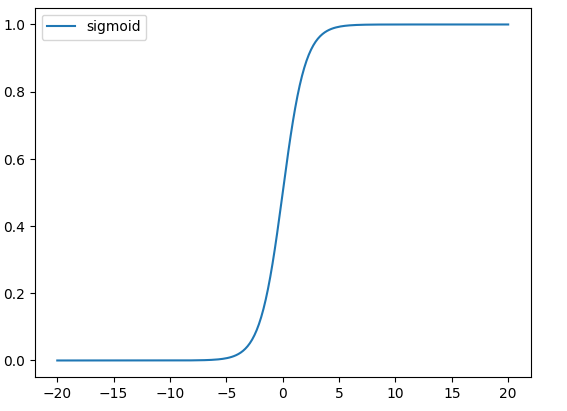
</center>
<br>
<br>


**Cross entropy loss function**

In binary classification, we can only have one of two values for the targets. Using the mean square error as before generally doesn't perform well in logistic regression. The most common loss function that works best for logistic regression problems is the <font color='red'>cross entropy loss function</font> defined as follows:
<br>
<center>
 $$ -y_i \log(p_i) - (1-y_i) \log (1-p_i),$$
</center>
where $p_i = \sigma (z)$ with $z$ being the output of our model function.
<br>

**Code task**:
1. Implement the sigmoid activation function.
2. Implement the cross entropy loss function.


In [ ]:
def sigmoid(x):
    """sigmoid function 1/1+e^-x"""

    prob = ... # update me

    return prob

In [ ]:
# @title Run me to test your code
def test_sigmoid_fn():
  x  = np.array([0.7, 0.3, 0.8, 0.2])
  assert jnp.allclose(sigmoid(x), jax.nn.sigmoid(x)), "Test failed!"
  print("Nice! Your answer looks correct!")

  return

In [ ]:
# @title sigmoid solution (Try not to peek until you've given it a good try!')
def sigmoid(x):
  prob = 1/(1+jnp.exp(-x))

  return prob

In [ ]:
def cross_entropy_loss(predictions, targets):
    # you need to make sure we never have log of 0

    # use sigmoid to compute the probs from the predicitions
    probs = ... # update me

    # your code here
    loss = ... # update me

    return loss

In [ ]:
# @title Run me to test your code
def test_cross_entropy_loss():
  predictions = np.array([0.7, 0.3, 0.8, 0.2])
  targets = np.array([1, 0, 1, 0])

  # Expected cross-entropy loss for the test data
  expected_loss = 0.60669523

  # Calculate the cross-entropy loss using the implemented function
  computed_loss = cross_entropy_loss(predictions, targets)

  assert jnp.isclose(computed_loss, expected_loss), "Test failed!"

  # If the assert statement does not raise an exception, the test is passed.
  print("Nice! Your anwser looks correct")

  return

test_cross_entropy_loss()

In [ ]:
# @title Cross entropy loss solution (Try not to peek until you've given it a good try!')
def cross_entropy_loss(preds, targets):
    eps = 1e-15
    probs = sigmoid(preds)

    loss = -targets*jnp.log(probs+eps) - (1-targets)*jnp.log(1-probs+eps)

    return jnp.mean(loss)

#### Extending to Multi-class classification

In multi-class classification, the machine learning model is designed to handle more than two classes, where each class represents a different category or label. For example, in the case of a single-digit classifier, there are 10 classes, each corresponding to a digit from 0 to 9.

The model's output is typically a probability distribution over all possible classes, with each class having an associated probability. The dimensions of the output vector match the number of classes, so for a classifier with 3 different classes, the output vector will have a dimension of 3.

To make a prediction, the model selects the class with the highest probability as the predicted class for the input data point.

**One-hot encoding**

One-hot encoding is a common technique used to represent categorical variables, such as class labels, as binary vectors. In the case of multi-class classification with 3 classes, the targets are transformed into one-hot encoded vectors as follows:

Class 1: [1, 0, 0]: This means the data point belongs to class 1, and the first element in the vector is set to 1, while the other elements are set to 0.

Class 2: [0, 1, 0]: This means the data point belongs to class 2, and the second element in the vector is set to 1, while the other elements are set to 0.

Class 3: [0, 0, 1]: This means the data point belongs to class 3, and the third element in the vector is set to 1, while the other elements are set to 0.

We can use `jax.nn.one_hot` function to one-hot encode our data.


In [ ]:
# An example using one hot encoding
num_classes =  3
targets = jnp.array([2, 0, 1])
one_hot_targets = jax.nn.one_hot(targets, num_classes)
print(f"Example of One hot encordings: {one_hot_targets}")

**Exercise**: Discuss with your neighbour how we should define the loss function in the case of multi-class classification.

**Solution**: The loss function for a multi-classification is computed similarly to that of a binary classifier. However in this case we define the loss as the sum of the loss for each of the individual classes.
<br>
<center>
 $$ \sum_c -y^c_i \log(p^c_i),$$
</center>
where $p^c_i = \text{softmax}(z) = \frac{e^{z^c_i}}{\sum_c e^{z^c_i}}$ with $z$ being the output of our model function.
<br>
The main difference here is that we use a $\text{softmax}$ activation function instead of $\text{sigmoid}$ as for the binary case.

**Exercise 3 [OPTIONAL]**: Do your get the initution why this formula is similar to that for the binary case?

**Solution**: Scroll to the [Appendix](#scrollTo=fRYbQvz01Zlm).

**Code task**:
  1. Implement the softmax activation function
  2. Implement a cross entropy loss function for multiclass classification using softmax and one hot encoding.

In [ ]:
def softmax(logits):
  """Compute softmax: `exp(x)/sum(exp(x))`

  Args:
    logits: array of shape (num_samples, num_classes)

  Return:
    probs: array of shape (num_samples, num_classes)
  """

  # your code here
  # make sure you sum across the right axis

  probs = ... # update me

  return probs

In [ ]:
# @title Run me to test your code
def test_softmax():
  x = jnp.array([[1.0, 0.4, 0.3], [10.0, 4.6, 8.9]])
  assert jnp.allclose(softmax(x), jax.nn.softmax(x, axis=-1))
  print("Nice! Your answer looks correct.")

test_softmax()

In [ ]:
# @title softmax solution (Try not to peek until you've given it a good try!')
def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)

In [ ]:
def cross_entropy_softmax_loss(predictions, targets):
    """Compute the cross entropy softmax loss function

      Args:
        predictions: (num_samples, num_classes)
        targets: (num_samples)
    """

    # Compute the softmax probabilities
    probs = ... # update me

    num_classes = ... # update me

    # One-hot encode the targets
    targets_one_hot = ... # update me

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss = ... # update me

    return loss

In [ ]:
# @title Run me to test your code
def test_cross_entropy_softmax_loss():
  # Fixed predictions (logits) for each class
  predictions = jnp.array([[1.5, 0.3, 2.7],
        [0.8, 1.2, 3.1], [2.3, 1.7, 0.5],
        [3.0, 0.5, 1.2], [0.2, 2.8, 1.0]])

  # Fixed true class labels
  targets = jnp.array([2, 1, 0, 0, 2])

  # Expected loss computed manually
  expected_loss = 1.0456787

  # Compute the cross-entropy softmax loss using your implementation
  loss = cross_entropy_softmax_loss(predictions, targets)

  # Check if the computed loss matches the JAX built-in loss
  assert jnp.allclose(loss, expected_loss), "Loss value do not match!"

  print("Nice! Your answer looks correct.")

test_cross_entropy_softmax_loss()

In [ ]:
# @title Cross entropy softmax solution (Try not to peek until you've given it a good try!')
def cross_entropy_softmax_loss(predictions, targets):
    """Compute the cross entropy softmax loss function

      Args:
        predictions: (num_samples, num_classes)
        targets: (num_samples)
    """

    # Compute the softmax probabilities
    probs = softmax(predictions) # update me

    num_classes = predictions.shape[-1]

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes) # update me

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1) # update me

    return jnp.mean(loss_i)

#### Building a simple neural network for classification

In this section, we will assemble all the pieces and train a deep neural network for classification. Let's recall all the tools we mentioned initially that are necessary to train a machine learning model.

1. Dataset: we need to have a dataset which we will split into training and validation sets in the ratio 80:20.
2. A model function.
3. A loss function.
4. An optimisation algorithm.

We will load the data using [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html). We have not discussed data preprocessing but in practice, we usually have to preprocess our datasets before using them for training. Such steps may include for example visualising the data to have intuition, identifying outliers, transforming and even dropping some features.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import jax
import jax.numpy as jnp
from typing import NamedTuple, Any

import matplotlib.pyplot as plt
import numpy as np

# Let re-adapt our batch gradient descent function
def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Batch gradient descent basic jax implementation.

  Args:
    loss_fn
      the loss function for our model.
    params:
      the initial parameters of the model.
    training_data
      a tuple with the features and targets for training.
    val_data
      a tuple with the features and targets for validation.
    learning_rate
      learning rate
    num_epochs
      number of epochs
    batch_size:
      size of every mini batch
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Create empty list to store the training and validation loss.
  loss_train = [] # training loss
  loss_val  = [] # valisation loss

  # Define a function that computes loss and gradients
  loss_and_grad = jax.value_and_grad(loss_fn)

  for epoch in range(num_epochs):
    # Shuffle the data before every epoch
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)

    loss_train_epoch = []

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]
      # Compute loss and gradients using value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train_epoch.append(loss)

      # Update the parameters
      params = jax.tree_map(lambda p, g: p -learning_rate*g, params, grads)

    # We need to turn the list in to an array before applying jnp.mean
    mean_loss = jnp.mean(jnp.array(loss_train_epoch))
    loss_train.append(mean_loss)

    # Compute the validation loss at the end of the epoch
    loss_v = loss_fn(params, X_val, y_val)
    loss_val.append(loss_v)

  # Plot training and validation loss
  epochs = range(1, num_epochs+1)
  plt.plot(epochs, loss_train, label='Training Loss')
  plt.plot(epochs, loss_val, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  # Display the plot
  plt.show()

  return params

# Load the mnist dataset
def load_dataset(seed):
  mnist = fetch_openml(name='mnist_784', version=1, as_frame=False, parser='auto')
  # Extract the data and labels
  images, labels = mnist.data, mnist.target

  # These images consist of integer values from 0 to 255.0
  # We scale the images to min and max of 1
  x_max = 255.0
  x_min = 0.0

  images = (images - x_min)/(x_max - x_min)
  images = images.astype(jnp.float32)
  labels = labels.astype(jnp.float32)

  # These are images of shape 28x28 which have been flatten to shape 784
  X_train, X_test, y_train, y_test = train_test_split(
      images, labels, test_size=0.2, train_size=0.8, random_state=seed
  )

  train_dataset = (X_train, y_train)
  test_dataset = (X_test, y_test)

  return train_dataset, test_dataset

training_data, val_data = load_dataset(32)

**Code task:**
1. Build a neural network that outputs logits for each of the 10 classes.
2. Initialise your model with some dummy input.
3. Define your softmax cross entropy function.

In [ ]:
# @title Your code here
class Network(nn.Module):
  hidden_size: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = ...  # update me
    x = ...  # update me

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

# transform and intialiase the model.
seed = 32
input_size = 784 # remember our features are images of shape 28x28 flatten
hidden_size = ... # update me
output_size = ... # update me (hint: number classes)

# instantiate the model
model = Network... # update me

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)


def cross_entropy_softmax_loss(params, X, targets):
    """Compute the cross entropy softmax loss function

      Args:
        params: model parameters
        X: features arrary (num_samples, num_features)
        targets: (num_samples)
    """

    # use the model to compute the predictions
    preds = model.apply(params, X)

    # Compute the softmax probabilities
    probs = softmax(preds)

    num_classes = preds.shape[-1]

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes)

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1)

    return jnp.mean(loss_i)


In [ ]:
# @title Sample solution (Try not to peek until you've given it a good try!')
class Network(nn.Module):
  hidden_size: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

# transform and intialiase the model.
seed = 67
input_size = 784
hidden_size = 100
output_size = 10

# Instantiate the model
model = Network(hidden_size, output_size)

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)

def cross_entropy_softmax_loss(params, X, targets):
    """Compute the cross entropy softmax loss function

      Args:
        params: model params
        X: (num_features, num_classes)
        targets: (num_samples)
    """

    preds = model.apply(params, X)

    # Compute the softmax probabilities
    probs = softmax(preds)

    num_classes = preds.shape[-1]

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes)

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1)

    return jnp.mean(loss_i)

#### Training the model






**Code task:**
  1. Call the `batch_gradient_descent` function to train the model.
  2. Vary the `learning_rate` and the `batch_size` and observe the behaviour of the loss function.

In [ ]:
params = batch_gradient_descent ... # update me

In [ ]:
# @title Sample solution (Try not to peek until you've given it a good try!')
params = batch_gradient_descent(cross_entropy_softmax_loss, initial_params, training_data, val_data, learning_rate=0.01, num_epochs=10, batch_size=1000)

#### Evaluating the model
So far the only metric we have used to evaluate the performance of our model has been the loss function. However, when training a machine learning model, several other metrics can be used to assess the performance of the model. Furthermore, hyper-parameters are generally selected (fine-tuned) based on the most important metric we want to optimise. Below are some metrics that can be used for classification tasks.
*   **Accuracy**: This is the most common metric generally used in classification. It is a measure of the proportion of instances classified correctly. $$ \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

* **Precision**: This is a measure of the number of positive predictions. For example, if our model predicts 100 data points to belong to class 1, the precision is the percentage of these 100 data points that effectively belong to class 1. High precision is maybe necessary for example in medical diagnosis, where we don't want to make a wrong diagnosis on patients that leads to unnecessary treatment.

* **Recall**: This is a measure of the model's ability to efficiently identify all positive instances. For example, if the dataset has 100 data points belonging to class 1, how many are effectively classified to belong to class 1? The recall is crucial in cases where we don't want to miss any positive instance. For example, if we have a security company, we don't want to wrongly classify the signal from a user as being safe while he is actually in danger.

**Let's use accuracy to evaluate the performance of our trained classifier.**

Firstly let's define a prediction function that transforms the model output to class. Recall the output of the classifier is logits which correspond to unnormalised probabilities belonging to each class. Thus the predicted class is the one with the highest probability    

**Code Task**
  1. Implement a function `model_predict` that selects the appropriate class from the output of the model.

In [ ]:
# @title Your code here
def model_predict(params, X):
    """Use the model for predicition

      args:
        params: model parameters
        X: features array (num_samples, num_features)

      return
        pred: predicted class (num_samples, 1)
    """

    # call the model to compute the logits
    logits = model... # update me
    preds = ... # update me: hint use jnp.argmax

    return preds

In [ ]:
# @title Run to test your code
def test_model_predict():
    features = val_data[0][0:10]
    preds = model_predict(params, features)
    expected = jnp.argmax(model.apply(params, features), axis=-1)
    assert jnp.array_equal(preds, expected), "Failed! try again"
    print("Nice! Your answer looks correct.")

test_model_predict()

In [ ]:
# @title Solution model predict (Try not to peek until you've given it a good try!')
def model_predict(params, X):
    """Use the model for predicition

      args:
        params: model parameters
        X: features array (num_samples, num_features)

      return
        pred: predicted class (num_samples, 1)
    """

    # call the model to compute the logits
    logits = model.apply(params, X)
    preds = jnp.argmax(logits, axis=-1)

    return preds

In [ ]:
# @title Compute the accuray of your model
def compute_accuracy(data):
  """Compute the accuracy of the model"""

  X, y_true = data
  y_pred = model_predict(params, X).squeeze()

  acc = sum(y_pred==y_true)/len(y_true)

  return acc

train_acc = compute_accuracy(training_data)
val_acc = compute_accuracy(val_data)
print(f"The training accuracy is {train_acc} while the validation accuracy is {val_acc}")

Congratulations, we've just trained a machine learning model for classification using the popular mnist digit dataset.

**Take home challenge**:
- Are you satisfied with the accuracy of your model?
- What can you do to improve the accuracy of the model?

# **Conclusion**
**Summary:**
- Machine learning is the science of using data to build intelligent systems.
- Deep learning is the subset of machine learning methods that uses neural networks.
- Optimisation is the process of finding the parameters that make the loss of a function as small as possible.
- JAX is a new popular framework that can be used to compute derivatives and train machine learning models.  
- JAX combines Autograd and XLA to perform **accelerated** 🚀 numerical computations. These computations are achieved using transforms such as `jit`,`grad`,`vmap` and `pmap`.
- JAX's `grad` function automatically calculates the gradients of your functions for you!
- Gradient descent is an effective algorithm to learn linear models, but also more complicated models, where analytical solutions don't exist.
- We need to be careful not to over-fit or under-fit on our datasets.


**Next Steps:**

- If you are interested in going deeper into Linear Regression, we have a Bayesian Linear Regression section in the [Bayesian Deep Learning Prac](https://github.com/deep-learning-indaba/indaba-pracs-2022/blob/main/practicals/Bayesian_Deep_Learning_Prac.ipynb).
- Join the reinforcement learning practicals to taste a different flavour of machine learning.


**References:**

Part 1
1. Various JAX [docs](https://jax.readthedocs.io/en/latest/) - specifically [quickstart](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html), [common gotchas](https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html), [jitting](
https://jax.readthedocs.io/en/latest/jax-101/02-jitting.html#), [random numbers](https://jax.readthedocs.io/en/latest/jax-101/05-random-numbers.html) and [pmap](https://jax.readthedocs.io/en/latest/jax-101/06-parallelism.html?highlight=pmap#).
2. http://matpalm.com/blog/ymxb_pod_slice/
3. https://roberttlange.github.io/posts/2020/03/blog-post-10/
4. [Machine Learning with JAX - From Zero to Hero | Tutorial #1](https://www.youtube.com/watch?v=SstuvS-tVc0).

Part 2
1. Parts of this section are adapted from [Deepmind's Regression Tutorial](https://github.com/deepmind/educational/blob/master/colabs/summer_schools/intro_to_regression.ipynb).
2. https://d2l.ai/chapter_linear-networks/linear-regression.html
3. https://www.cs.toronto.edu/~rgrosse/courses/csc411_f18/slides/lec06-slides.pdf
4. [Linear Regression Chapter - Mathematics for Machine Learning Book](https://mml-book.github.io/).

Part 3
1. https://d2l.ai/chapter_linear-networks/linear-regression.html
2. https://jax.readthedocs.io/en/latest/notebooks/quickstart.html
3. https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/ai-vs-machine-learning-vs-deep-learning


For other practicals from the Deep Learning Indaba, please visit [here](https://github.com/deep-learning-indaba/indaba-pracs-2024).

# **Appendix:**



## Derivation of partial derivatives for exercise 2.4.

Derive $\frac{\partial \mathcal{L}}{\partial w}$:
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial w} & = \frac{ \partial}{\partial w} (\frac{1}{2N} \sum_{i=1}^N (y_i - (w x_i + b))^2) \because{Definition of $\mathcal{L}$} \\
 \frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{2N} \frac{ \partial }{\partial w} ( \sum_{i=1}^N (y_i - (w x_i + b))^2) \because{Constant multiple rule} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{2N} \sum_{i=1}^N \frac{ \partial }{\partial w} (y_i - (w x_i + b))^2 \because{Sum Rule - derivative of sum is sum of derivatives.} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{2N} \sum_{i=1}^N 2 (y_i - (w x_i + b)) \frac{ \partial }{\partial w}(y_i -(w x_i + b))  \because{Power Rule + Chain Rule.} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{2N} \sum_{i=1}^N 2 (y_i - (w x_i + b)) (-x_i)  \because{Compute derative.} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1(2)}{2N} \sum_{i=1}^N  (y_i - (w x_i + b)) (-x_i)  \because{Factor constant out of summation.} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{N} \sum_{i=1}^N  -y_ix_i + (w x_i + b)x_i  \because{Multiply brackets and simplify.} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{N} \sum_{i=1}^N  (-y_i + (w x_i + b))x_i  \because{Rewrite.} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{N} \sum_{i=1}^N  ((w x_i + b) -y_i )x_i  \because{Rewrite.} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{N} \sum_{i=1}^N  (f(x_i) -y_i )x_i  \because{Substitute in $f(x_i)$.} \\  
\end{aligned}

Derive $\frac{\partial \mathcal{L}}{\partial b}$:
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial b} & = \frac{ \partial}{\partial b} (\frac{1}{2N} \sum_{i=1}^N (y_i - (w x_i + b))^2) \because{Definition of $\mathcal{L}$} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{2N} \frac{ \partial }{\partial b} ( \sum_{i=1}^N (y_i - (w x_i + b))^2) \because{Constant multiple rule} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{2N} \sum_{i=1}^N \frac{ \partial }{\partial b} (y_i - (w x_i + b))^2 \because{Sum Rule - derivative of sum is sum of derivatives.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{2N} \sum_{i=1}^N 2 (y_i - (w x_i + b)) \frac{ \partial }{\partial b}(y_i -(w x_i + b))  \because{Power Rule + Chain Rule.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{2N} \sum_{i=1}^N 2 (y_i - (w x_i + b)) (-1)  \because{Compute derative.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1(2)}{2N} \sum_{i=1}^N (y_i - (w x_i + b)) (-1)  \because{Factor constant out of summation.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{N} \sum_{i=1}^N (-y_i + (w x_i + b))  \because{Multiply brackets and simplify.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{N} \sum_{i=1}^N ((w x_i + b) -y_i )  \because{Rewrite.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{N} \sum_{i=1}^N (f(x_i) -y_i )  \because{Substitute in $f(x_i)$.} \\
\end{aligned}

# **Feedback**

Please provide feedback that we can use to improve our practicals in the future.

In [ ]:
# @title Generate Feedback Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/WUpRupqfhFtbLXtN6",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

<img src="https://baobab.deeplearningindaba.com/static/media/indaba-logo-dark.d5a6196d.png" width="50%" />